In [5]:
# 📊 Classification Metrics

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, log_loss
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
# Generate sample classification dataset
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [8]:
# ---- Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[135  11]
 [ 22 132]]


In [9]:
# ---- Accuracy
# Formula: Accuracy = (TP + TN) / (TP + TN + FP + FN)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.89


In [10]:
# ---- Precision
# Formula: Precision = TP / (TP + FP)
prec = precision_score(y_test, y_pred)
print("Precision:", prec)

Precision: 0.9230769230769231


In [11]:
# ---- Recall
# Formula: Recall = TP / (TP + FN)
rec = recall_score(y_test, y_pred)
print("Recall:", rec)

Recall: 0.8571428571428571


In [ ]:
# ---- F1 Score
# Formula: F1 = 2 * (Precision * Recall) / (Precision + Recall)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

In [ ]:
# ---- Log Loss
# Formula: - (1/n) Σ [ yi * log(pi) + (1 - yi) * log(1 - pi) ]
ll = log_loss(y_test, y_prob)
print("Log Loss:", ll)

In [12]:
# Let's assume we already have:
# y_test  = actual labels (0 or 1)
# y_prob  = predicted probabilities for the positive class (values between 0 and 1)

# roc_curve() calculates three things:
# fpr = False Positive Rate
# tpr = True Positive Rate
# thresholds = cutoff points for classifying probabilities into 0 or 1

# ---- ROC Curve & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

AUC: 0.9560131649172745


In [13]:
# Optional: Plot ROC Curve
import matplotlib.pyplot as plt

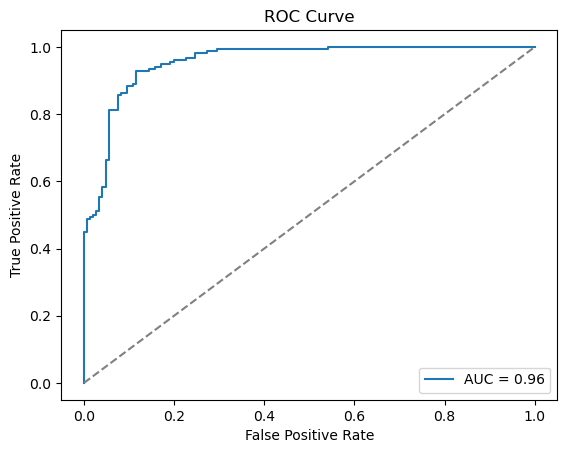

In [14]:

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}") # ROC curve
plt.plot([0, 1], [0, 1], linestyle="--", color="gray") # diagonal line (random guessing)
plt.xlabel("False Positive Rate") # X-axis label
plt.ylabel("True Positive Rate") # Y-axis label
plt.title("ROC Curve") # Chart title
plt.legend()  # Show AUC value in legend
plt.show()